# Upper Confidence Bound (UCB)
In this exercise, we will be experimenting with the Multi-armed bandit problem with the Upper Confidence Bound (UCB) algorithm described in chapter 8 in the textbook (UCB asymptotic optimality).

## Setup
Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with a random reward at time $t$ given by $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t]$ is drawn from an i.i.d. standard Gaussian distribution. Note that we only require $\epsilon[t]$ to be sub-Gaussian for the analysis to go through.

The following code should be implemented to capture this setup.

# Reward function
Question: Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,I)$ where $I$ is the identity matrix of size $k \times k$.

In [1]:
def get_reward(avg):
    k = len(avg)
    epsilon = np.random.normal(0, 1, k)
    rew = avg + epsilon
    return rew

## Algorithm review
Recall that there is only one parameter of interest in the UCB algoritm that is $k$ which is the number of arms. Please refer to the lecture notes and the textbook for details (Check algorithm 6 on page 116). The algorithm is as follows:

1. First choose each arm once.
2. Subsequently, choose the arm with the highest upper confidence bound.
3. Observe the reward and update the upper confidence bounds and repeat.

## Goal of this exercise
Implement the following using the template provided below. Please use the variable names suggested in the comments.
1. Basic UCB algorithm implementation
2. Plot the expected cumulative regret of the UCB algorithm as a function of time.
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the UCB algorithm. (Hint: use the semilogx function in matplotlib.pyplot) 

# Import Dependencies

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

## UCB
Question:\
Implement UCB algorithm using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [4]:
class UCB(object):
    def __init__(self, avg):
        self.means = avg
        self.num_arms = avg.size        
        self.best_arm = np.argmax(self.means)
        self.restart()

    def restart(self):
        self.time = 0.0
        self.ucb_arr = np.inf * np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)
        self.num_pulls = np.zeros(self.num_arms)
        self.cum_reg = np.zeros(num_iter)
    
    def get_best_arm(self):
        return np.argmax(self.ucb_arr)
    
    def update_stats(self, arm, rew):
        self.num_pulls[arm] += 1
        self.emp_means[arm] = ((self.emp_means[arm] * (self.num_pulls[arm] - 1)) + rew) / self.num_pulls[arm]
        self.time += 1
    
    def update_ucb(self):
        for arm in range(self.num_arms):
            if self.num_pulls[arm] > 0:
                self.ucb_arr[arm] = self.emp_means[arm] + np.sqrt(2 * np.log(self.time) / self.num_pulls[arm])
    
    def update_reg(self, arm, rew_vec):
        self.cum_reg[int(self.time)] = self.cum_reg[int(self.time) - 1] + (rew_vec[self.best_arm] - rew_vec[arm])
    
    def iterate(self, rew_vec):
        arm = self.get_best_arm()
        rew = rew_vec[arm]
        
        self.update_stats(arm, rew)
        self.update_ucb()
        self.update_reg(arm, rew_vec)
    

# Experiment Function
The following code runs the UCB algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time at which we stop.

In [5]:
def run_algo(avg, num_iter, num_inst):
    reg = np.zeros((num_inst, num_iter))
    
    algo = UCB(avg)
    
    for k in range(num_inst):
        algo.restart()
        
        if (k+1)%10 == 0:
            print('Instance number = ', k+1)
        
        for t in range(num_iter-1):
            rew_vec = get_reward(avg)
            algo.iterate(rew_vec)
            
        reg[k,:] = np.asarray(algo.cum_reg)
        
    return reg

# Initializations
Use the following to initialize your algorithm. The value of $k$ is implicitly set to $6$ in the initialization below. (This vector contains the actual mean rewards).

In [6]:
avg = np.asarray([0.8, 0.96,0.7,0.5, 0.4, 0.3])
num_iter,num_inst = int(5e4),30

# Run Experiment



In [7]:
reg = run_algo(avg, num_iter, num_inst)

Instance number =  10
Instance number =  20
Instance number =  30


## Plotting the Results
Questions: 

1 - Compute the average regret over the number of instances and plot it against the number of iterations. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with UCB'.

2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

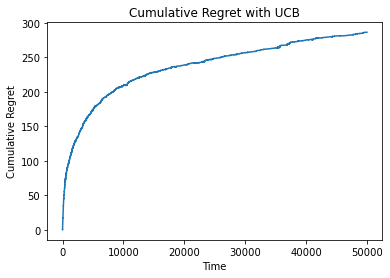

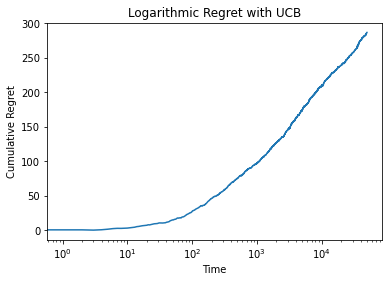

In [8]:
avg_reg = np.mean(reg, axis=0)
plt.figure()
plt.plot(np.arange(num_iter), avg_reg)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with UCB')
plt.show()

plt.figure()
plt.semilogx(np.arange(num_iter), avg_reg)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Logarithmic Regret with UCB')
plt.show()